In [52]:
import pandas as pd
import preprocess
import json
import matplotlib.pyplot as plt
import numpy as np

In [53]:
df = pd.read_csv("training.full.csv")

(array([7.33614e+05, 6.48243e+05, 2.17723e+05, 3.59000e+02, 2.90000e+01,
        1.60000e+01, 7.00000e+00, 3.00000e+00, 4.00000e+00, 2.00000e+00]),
 array([  2. ,  12.8,  23.6,  34.4,  45.2,  56. ,  66.8,  77.6,  88.4,
         99.2, 110. ]),
 <a list of 10 Patch objects>)

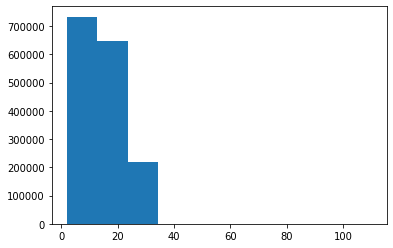

In [55]:
tweet_len = []
for tweet in df["Tweet"]:
    tweet_len.append(len(tweet.split(" ")))
plt.hist(tweet_len)

In [56]:
tweet_len = np.array(tweet_len)
len(tweet_len[tweet_len>20])/len(tweet_len)

0.22866125

In [57]:
a = preprocess.Preprocessor()

In [58]:
a = preprocess.Preprocessor()
# input_text = "Taking my folks to the Gospel Brunch at the House of Blues..what a good son I am "
# input_text = "@Nana_Mex @KellyThomas1  Thanks for the shout Kelly ,Have a great day lol "
# input_text = "Damn it.  TV on the Radio is playing the Central Park Summer Stage right now, and I didn't know until 30 seconds ago.  "
# input_text = "I HAVE NO LUCK WAT SO EVA WID CATCHIN ANYBODY ONLINE ON TWITTER!  I TINK IMMA HUDDLE UP IN A CORNER NDD CRY NOW :'("
# input_text = "Aw, New Moon looks so bad  Can't wait to see Michael Sheen in it, though!"
# input_text = "Watching Mickey Rourke in The Wrestler. Gotta see what all the fuss was about. "
# input_text = "wasn't cant wait for the new hannah motana programmes to come out there gonna be soooo coool! "
# input_text = "@ChaosMagick Really?! Oh, OK then, just for you   http://twitpic.com/7gk5o"
# input_text = "I saw the New Moon Trailer/Preview a few hours and minutes ago! It was great! I can't wait to watch New Moon this year!  "
# input_text = "Re-Readin Eclipse.. Cant wait For New Moon "
# input_text = "@makelyb excluidinha!!! @Thaaiiis tÃ¡ "
input_text = "Looooooooooooooooooong story! sooooooooo excited! soo amazing! Short version: got a splinter in his arm - it got infected because the Drs. staff didn't do their job "
# input_text = "удивительно beebbeebbeebbeebbeebbeeb 詞的超強記憶力 مرره 回目を通"
# input_text = ""
# input_text = ""
# input_text = ""
# input_text = ":( LoL 123 !q @w #e $r %r ^u  &jj *jJ (jkj 0KJ0) -i _j +j {j }j |js :n 'L it's don't Aw Dont Be A Meany  (Susan) Rocls. adfasd Say Hi For Me :L:L"
tmp = a.clean_text(input_text) ; print(tmp)
tmp = a.tokenize_text(tmp) ; print(tmp)
tmp = a.replace_token_with_index(tmp, a.max_length_dictionary) ; print(tmp)
tmp = a.pad_sequence(tmp, a.max_length_tweet) ; print(tmp)

looooooooooooooooooong story  sooooooooo excited  soo amazing  short version  got a splinter in his arm   it got infected because the drs  staff didnt do their job
['looong', 'story', 'sooo', 'excited', 'soo', 'amazing', 'short', 'version', 'got', 'a', 'splinter', 'in', 'his', 'arm', 'it', 'got', 'infected', 'because', 'the', 'drs', 'staff', 'didnt', 'do', 'their', 'job']
[31172, 771, 70937, 710, 1362, 443, 1285, 2254, 98, 4, 32603, 16, 174, 3818, 15, 98, 22397, 188, 5, 32229, 4984, 1494, 21, 260, 623]
[31172, 771, 70937, 710, 1362, 443, 1285, 2254, 98, 4, 32603, 16, 174, 3818, 15, 98, 22397, 188, 5, 32229, 4984, 1494, 21, 260, 623, 0, 0, 0, 0, 0]


In [39]:
def convert_to_json(df, file_path, preprocessor):
    progress = 0
    result = []
    for idx, row in df.iterrows():
        progress += 1
        if progress%(df.shape[0]//20)==0:
            print(progress/(df.shape[0]//20))
        
        _dict = {}
        _dict["features"] = preprocessor.preprocess_text(row["Tweet"])
        _dict["sentiment"] = row["Sentiment"]
        result.append(_dict)
    with open(file_path, 'w', encoding='utf-8') as f:
        for entry in result:
            json.dump(entry, f)
            f.write('\n')
    f.close()

# Split all data

In [48]:
df = pd.read_csv("training.full.csv")

df_train = df.sample(frac=0.95,random_state=200)
df_eval = df.drop(df_train.index)
df_dev = df_train.sample(frac=0.10/0.95, random_state=200)
df_train = df_train.drop(df_dev.index)

# check portion
print(df_train.shape[0]/df.shape[0])
print(df_dev.shape[0]/df.shape[0])
print(df_eval.shape[0]/df.shape[0])

# check distribution
print(df.loc[df["Sentiment"]==0].shape[0]/df.shape[0])
print(df_train.loc[df_train["Sentiment"]==0].shape[0]/df_train.shape[0])
print(df_dev.loc[df_dev["Sentiment"]==0].shape[0]/df_dev.shape[0])
print(df_eval.loc[df_eval["Sentiment"]==0].shape[0]/df_eval.shape[0])

# output dataframe
df_train.to_csv("complete/train.csv", index=False)
df_dev.to_csv("complete/dev.csv", index=False)
df_eval.to_csv("complete/eval.csv", index=False)

0.85
0.1
0.05
0.5
0.5003235294117647
0.49775625
0.4989875


In [49]:
convert_to_json(df_eval, "complete/eval.json", a)
convert_to_json(df_dev, "complete/dev.json", a)
convert_to_json(df_train, "complete/train.json", a)

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0


# Split 1/10 of the data

In [40]:
df = pd.read_csv("training.full.csv")
df = df.sample(frac=0.1,random_state=200)

df_train = df.sample(frac=0.95,random_state=200)
df_eval = df.drop(df_train.index)
df_dev = df_train.sample(frac=0.10/0.95, random_state=200)
df_train = df_train.drop(df_dev.index)

# check portion
print(df_train.shape[0]/df.shape[0])
print(df_dev.shape[0]/df.shape[0])
print(df_eval.shape[0]/df.shape[0])

# check distribution
print(df.loc[df["Sentiment"]==0].shape[0]/df.shape[0])
print(df_train.loc[df_train["Sentiment"]==0].shape[0]/df_train.shape[0])
print(df_dev.loc[df_dev["Sentiment"]==0].shape[0]/df_dev.shape[0])
print(df_eval.loc[df_eval["Sentiment"]==0].shape[0]/df_eval.shape[0])

df_train.to_csv("one_tenth/train.csv", index=False)
df_dev.to_csv("one_tenth/dev.csv", index=False)
df_eval.to_csv("one_tenth/eval.csv", index=False)

0.85
0.1
0.05
0.50113125
0.5007720588235294
0.5041875
0.501125


In [41]:
convert_to_json(df_eval, "one_tenth/eval.json", a)
convert_to_json(df_dev, "one_tenth/dev.json", a)
convert_to_json(df_train, "one_tenth/train.json", a)

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0


# Split 1/5 of the data

In [45]:
df = pd.read_csv("training.full.csv")
df = df.sample(frac=0.2,random_state=200)

df_train = df.sample(frac=0.95,random_state=200)
df_eval = df.drop(df_train.index)
df_dev = df_train.sample(frac=0.10/0.95, random_state=200)
df_train = df_train.drop(df_dev.index)

# check portion
print(df_train.shape[0]/df.shape[0])
print(df_dev.shape[0]/df.shape[0])
print(df_eval.shape[0]/df.shape[0])

# check distribution
print(df.loc[df["Sentiment"]==0].shape[0]/df.shape[0])
print(df_train.loc[df_train["Sentiment"]==0].shape[0]/df_train.shape[0])
print(df_dev.loc[df_dev["Sentiment"]==0].shape[0]/df_dev.shape[0])
print(df_eval.loc[df_eval["Sentiment"]==0].shape[0]/df_eval.shape[0])

df_train.to_csv("one_fifth/train.csv", index=False)
df_dev.to_csv("one_fifth/dev.csv", index=False)
df_eval.to_csv("one_fifth/eval.csv", index=False)

0.85
0.1
0.05
0.4995875
0.49969117647058825
0.498625
0.49975


In [47]:
convert_to_json(df_eval, "one_fifth/eval.json", a)
convert_to_json(df_dev, "one_fifth/dev.json", a)
convert_to_json(df_train, "one_fifth/train.json", a)

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0


# 0.04 of the data

In [50]:
df = pd.read_csv("training.full.csv")
df = df.drop(df_eval.index)
df = df.sample(frac=0.04,random_state=200)

df_train = df.sample(frac=0.95,random_state=200)
df_eval = df.drop(df_train.index)
df_dev = df_train.sample(frac=0.10/0.95, random_state=200)
df_train = df_train.drop(df_dev.index)

# check portion
print(df_train.shape[0]/df.shape[0])
print(df_dev.shape[0]/df.shape[0])
print(df_eval.shape[0]/df.shape[0])

# check distribution
print(df.loc[df["Sentiment"]==0].shape[0]/df.shape[0])
print(df_train.loc[df_train["Sentiment"]==0].shape[0]/df_train.shape[0])
print(df_dev.loc[df_dev["Sentiment"]==0].shape[0]/df_dev.shape[0])
print(df_eval.loc[df_eval["Sentiment"]==0].shape[0]/df_eval.shape[0])

df_train.to_csv("one_25th/train.csv", index=False)
df_dev.to_csv("one_25th/dev.csv", index=False)
df_eval.to_csv("one_25th/eval.csv", index=False)

0.85
0.1
0.05
0.500328947368421
0.4988970588235294
0.503125
0.5190789473684211


In [51]:
convert_to_json(df_eval, "one_25th/eval.json", a)
convert_to_json(df_dev, "one_25th/dev.json", a)
convert_to_json(df_train, "one_25th/train.json", a)

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
